<a href="https://colab.research.google.com/github/NaveenNKD2001/Image-classification/blob/main/Image_Classification_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score,precision_score,recall_score

In [2]:
(train_images,train_labels),(test_images,test_labels)=tf.keras.datasets.cifar10.load_data()

In [3]:
train_images.shape

(50000, 32, 32, 3)

In [4]:
test_images.shape

(10000, 32, 32, 3)

In [5]:
def augmentation(batch_images):
  batch_images=tf.image.random_flip_left_right(batch_images)
  batch_images=tf.image.rot90(batch_images,k=tf.random.uniform(shape=[],minval=0,maxval=4,dtype=tf.int32))

  return batch_images.numpy()

In [6]:
n_train_images=train_images/255.0
augmented_train_images=augmentation(train_images)
n_augmented_train_images=augmented_train_images/255.0
n_test_images=test_images/255.0

In [7]:
def vgg16_model_creation():
  vgg16=tf.keras.applications.VGG16(weights='imagenet',input_shape=(32,32,3),include_top=False)
  model=tf.keras.Sequential()
  model.add(vgg16)
  model.add(tf.keras.layers.Flatten())

  model.add(tf.keras.layers.Dense(256,activation='relu'))
  model.add(tf.keras.layers.Dropout(0.5))
  model.add(tf.keras.layers.Dense(128,activation='relu'))
  model.add(tf.keras.layers.Dense(64,activation='relu'))
  model.add(tf.keras.layers.Dense(10,'softmax'))

  model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

  return model


In [8]:
reduce_lr=tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=3,min_lr=0.0000001)

#Without Augmentation and Without Noramlized Input and Output

In [9]:
checkpoint=tf.keras.callbacks.ModelCheckpoint('vgg16.keras',mode='max',monitor='val_accuracy',save_best_only=True)

In [10]:
vgg16_model=vgg16_model_creation()
history=vgg16_model.fit(train_images,train_labels,validation_data=(test_images,test_labels),epochs=50,callbacks=[checkpoint,reduce_lr])

Epoch 1/50
1563/1563 [==============================] - 71s 34ms/step - loss: 2.0294 - accuracy: 0.1904 - val_loss: 1.8818 - val_accuracy: 0.2137 - lr: 0.0010
Epoch 2/50
1563/1563 [==============================] - 52s 33ms/step - loss: 1.6929 - accuracy: 0.3233 - val_loss: 1.5097 - val_accuracy: 0.4052 - lr: 0.0010
Epoch 3/50
1563/1563 [==============================] - 48s 31ms/step - loss: 1.3774 - accuracy: 0.4679 - val_loss: 1.2261 - val_accuracy: 0.5408 - lr: 0.0010
Epoch 4/50
1563/1563 [==============================] - 53s 34ms/step - loss: 1.1722 - accuracy: 0.5767 - val_loss: 1.1010 - val_accuracy: 0.6117 - lr: 0.0010
Epoch 5/50
1563/1563 [==============================] - 51s 33ms/step - loss: 1.0509 - accuracy: 0.6333 - val_loss: 0.9938 - val_accuracy: 0.6488 - lr: 0.0010
Epoch 6/50
1563/1563 [==============================] - 52s 34ms/step - loss: 0.9708 - accuracy: 0.6658 - val_loss: 0.9332 - val_accuracy: 0.6719 - lr: 0.0010
Epoch 7/50
1563/1563 [========================

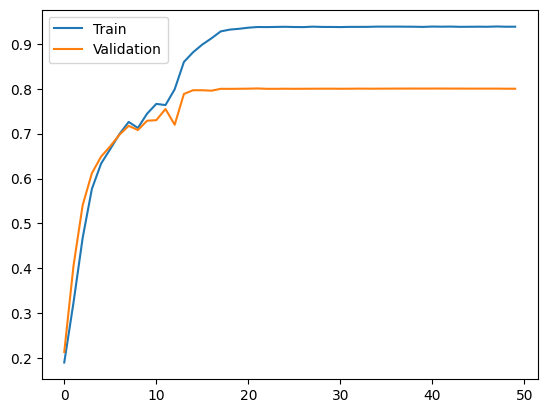

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

In [13]:
vgg16_model.load_weights('vgg16.keras')
vgg16_model.evaluate(test_images,test_labels)

313/313 [==============================] - 3s 11ms/step - loss: 0.8997 - accuracy: 0.8006


[0.8996652364730835, 0.800599992275238]

In [14]:
y_pred=vgg16_model.predict(test_images)
y_pred=np.argmax(y_pred,axis=1)

313/313 [==============================] - 3s 9ms/step


In [15]:
print(accuracy_score(y_pred,test_labels))
print(precision_score(y_pred,test_labels,average='weighted'))
print(recall_score(y_pred,test_labels,average='weighted'))

0.8006
0.8002523
0.8006


#Normalized Input and Output

In [16]:
checkpoint=tf.keras.callbacks.ModelCheckpoint('vgg16_n.keras',mode='max',monitor='val_accuracy',save_best_only=True)

In [17]:
vgg16_model_n=vgg16_model_creation()
history=vgg16_model_n.fit(n_train_images,train_labels,validation_data=(n_test_images,test_labels),epochs=50,callbacks=[checkpoint,reduce_lr])

Epoch 1/50
1563/1563 [==============================] - 58s 35ms/step - loss: 1.8890 - accuracy: 0.2270 - val_loss: 1.7003 - val_accuracy: 0.3108 - lr: 0.0010
Epoch 2/50
1563/1563 [==============================] - 52s 33ms/step - loss: 1.6395 - accuracy: 0.3338 - val_loss: 1.5376 - val_accuracy: 0.3682 - lr: 0.0010
Epoch 3/50
1563/1563 [==============================] - 49s 31ms/step - loss: 1.4833 - accuracy: 0.4158 - val_loss: 1.3167 - val_accuracy: 0.4924 - lr: 0.0010
Epoch 4/50
1563/1563 [==============================] - 48s 31ms/step - loss: 1.2514 - accuracy: 0.5339 - val_loss: 1.1393 - val_accuracy: 0.5791 - lr: 0.0010
Epoch 5/50
1563/1563 [==============================] - 52s 33ms/step - loss: 1.1503 - accuracy: 0.5772 - val_loss: 1.0689 - val_accuracy: 0.6015 - lr: 0.0010
Epoch 6/50
1563/1563 [==============================] - 52s 33ms/step - loss: 1.0830 - accuracy: 0.6014 - val_loss: 1.0053 - val_accuracy: 0.6291 - lr: 0.0010
Epoch 7/50
1563/1563 [========================

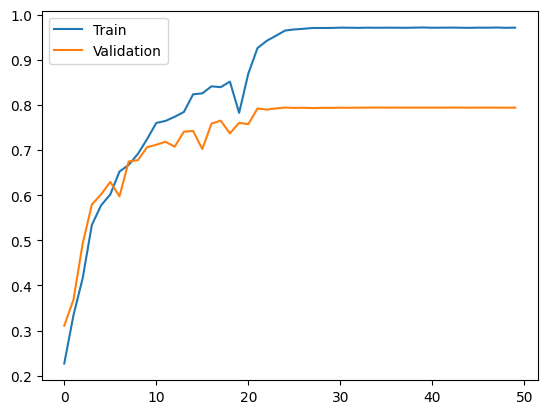

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

In [19]:
vgg16_model_n.load_weights('vgg16_n.keras')
vgg16_model_n.evaluate(n_test_images,test_labels)

313/313 [==============================] - 3s 8ms/step - loss: 0.9567 - accuracy: 0.7939


[0.9567089080810547, 0.7939000129699707]

In [20]:
y_pred=vgg16_model_n.predict(n_test_images)
y_pred=np.argmax(y_pred,axis=1)

313/313 [==============================] - 2s 7ms/step


In [21]:
print(accuracy_score(y_pred,test_labels))
print(precision_score(y_pred,test_labels,average='weighted'))
print(recall_score(y_pred,test_labels,average='weighted'))

0.7939
0.7925113000000001
0.7939
